<a href="https://colab.research.google.com/github/leejuny0ng/AI/blob/main/3%20%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D(Cluster_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

군집 분석 (Cluster Analysis)
- 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
- 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
- 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

텍스트 유사도
- 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
- 자카드 유사도?? : 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
- 코사인 유사도? : 벡터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 벡터 표현으로 활용 가능

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer # stemming을 할 수 있도록 함
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity # 다양한 코사인 유사도 계산을 위함

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)] # word를 소문자화해서 하나씩 가져옴
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)] # word를 소문자화해서 하나씩 가져옴

  inter = len(set(words1).intersection(set(words2))) # 교집합
  union = len(set(words1).union(set(words2)))

  return inter / union

In [ ]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try not to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, of give me death"

print(jaccard_similarity(d1, d2)) # man 덕에 유사도가 살짝 나옴
print(jaccard_similarity(d1, d3)) # 겹치는 단어가 없기에 유사도가 낮음
print(jaccard_similarity(d2, d3)) # 상동

# 코사인 similarity는 어떨까?
# vector로 표현한다했는데..

0.2222222222222222
0.06666666666666667
0.058823529411764705


코사인 유사도 확인

In [ ]:
tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).toarray() # 받을때는 todense로 받음 : 밀집 행렬로 표현
print(cosine_similarity([tfidf[0]], [tfidf[1]])) # tfidf가 2차원 배열이기에 각각 2차원 배열로 만들어서 받아줌
print(cosine_similarity([tfidf[0]], [tfidf[2]]))
print(cosine_similarity([tfidf[1]], [tfidf[2]]))


[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 25.9 MB/s eta 0:00:00


In [ ]:
!apt-get install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-utils
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 7,367 kB of archives.
After this operation, 59.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmecab2 amd64 0.996-14build9 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmecab-dev amd64 0.996-14build9 [306 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 mecab-utils amd64 0.996-14build9 [4,850 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 mecab-ipadic all 2.7.0-20070801+main-3 [6,718 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mecab amd64 0.996-14build9 [136 kB]
Get:6 http://archive.ubuntu.co

In [79]:
!pip install mecab-python3

In [ ]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


데이터 전처리
- https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [81]:
import urllib.request

raw = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt").readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [82]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [83]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]
# 형태소 분석으로 reviews에서 형태소 분석한 것을 가져옴

# print(reviews)
# 모든 reviews를 다 출력

Word2Vec 생성
- word2vec 생성에 필요한 라이브러리들을 추가

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc


- Word2Vec 모델 생성
- gensim의 Word2Vec은 선언과 동시에 학습을 해 단어 벡터들을 생성




In [ ]:
word2vec = Word2Vec(reviews, min_count = 5)
word2vec

In [ ]:
word2vec.wv.most_similar('영화') # Access the KeyedVectors object via the wv attribute

[('듯', 0.9320996403694153),
 ('작품', 0.9254214763641357),
 ('마음', 0.9072287082672119),
 ('따뜻', 0.8985245823860168),
 ('가슴', 0.8944151997566223),
 ('느낌', 0.8914318084716797),
 ('잔잔', 0.8898344039916992),
 ('표현', 0.889172375202179),
 ('모습', 0.8867492079734802),
 ('이야기', 0.8832527995109558)]

t-sne을 이용한 단어 벡터 시각화

In [ ]:
tsne = TSNE(n_components=2)
tsne

TSNE()

In [ ]:
vocab = word2vec.wv.key_to_index # Use key_to_index instead of vocab
similarity = word2vec.wv[vocab] # Access the KeyedVectors object via the wv attribute
similarity

array([[-4.17913124e-03,  7.96780705e-01,  1.36419296e-01, ...,
        -1.50463715e-01, -6.94728177e-03, -5.71996808e-01],
       [ 7.04456568e-02,  6.97696745e-01,  5.93726151e-02, ...,
        -3.39288741e-01,  1.65286377e-01, -3.54138583e-01],
       [ 2.23137274e-01,  3.24642539e-01, -9.77391154e-02, ...,
        -5.13715267e-01,  6.08032107e-01, -5.45261681e-01],
       ...,
       [ 4.73150099e-03,  4.10585068e-02, -6.37409650e-03, ...,
        -6.15872107e-02,  4.00406457e-02, -1.91162415e-02],
       [ 1.20107131e-02,  1.62344240e-02,  6.06631336e-04, ...,
        -2.16838643e-02,  1.42252375e-03, -1.32155195e-02],
       [ 1.16351014e-02,  4.31911685e-02,  6.32550893e-03, ...,
        -4.15898673e-02,  2.84335446e-02, -2.96396390e-02]], dtype=float32)

In [ ]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index = vocab, columns = ['x', 'y'])
df[:10]

,x,y
.,65.952652,-10.902525
이,64.881569,-26.030592
는,65.858093,-28.659065
영화,62.160324,-23.891682
다,71.777657,-9.396530
고,71.942833,-15.496774
의,62.756004,-30.710606
하,72.817818,-20.693764
을,65.970596,-28.710024
에,61.242470,-29.493935


<ipython-input-54-315796684f76>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


sns.lmplot is of type: <class 'function'>


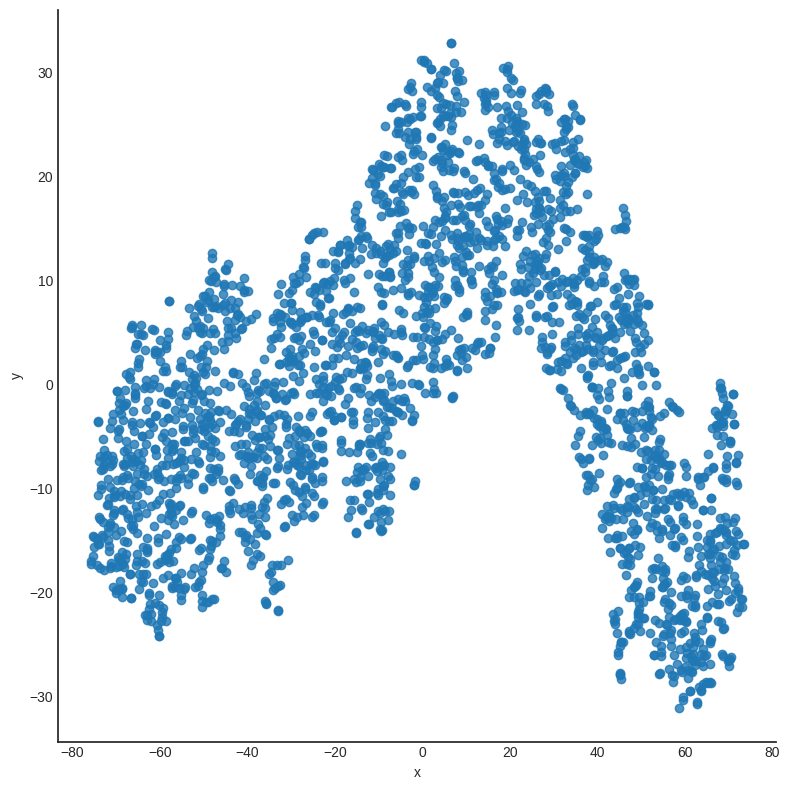

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# 시각화
print(f"sns.lmplot is of type: {type(sns.lmplot)}")

# If sns.lmplot is not a function, reset the seaborn module
if not callable(sns.lmplot):
  print("Resetting seaborn module")
  sns = reload(sns)

sns.lmplot(x = 'x', y = 'y', data=df, fit_reg=False, height=8)
plt.show()

Scikit-learn, Scipy를 이용한 계층적 군집화
- 계층적 군집화?? : 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
- 비계층적 군집화와는 달리 <-> 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점
- 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산 복잡도도 비계층적 군집화보다 큼

Scikit - learn
- 비계층적 군집화의 일종인 agglomerativeClustering(병합 군집)을 이용, 계층적 군집화 실습
- 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
- 병합 군집의 종료 조건에는 3가지를 지정 가능
1. ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
2. average - 클러스터 간 평균 거리가 가장 짧은 두 클러스터를 합침
3. complete - 클러스터 간 최대 거리가 가장 짧은 두 클러스터를 합침


> ward

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
predict = ward.fit_predict(df)
predict

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
.,65.952652,-10.902525,0
이,64.881569,-26.030592,0
는,65.858093,-28.659065,0
영화,62.160324,-23.891682,0
다,71.777657,-9.396530,0
고,71.942833,-15.496774,0
의,62.756004,-30.710606,0
하,72.817818,-20.693764,0
을,65.970596,-28.710024,0
에,61.242470,-29.493935,0


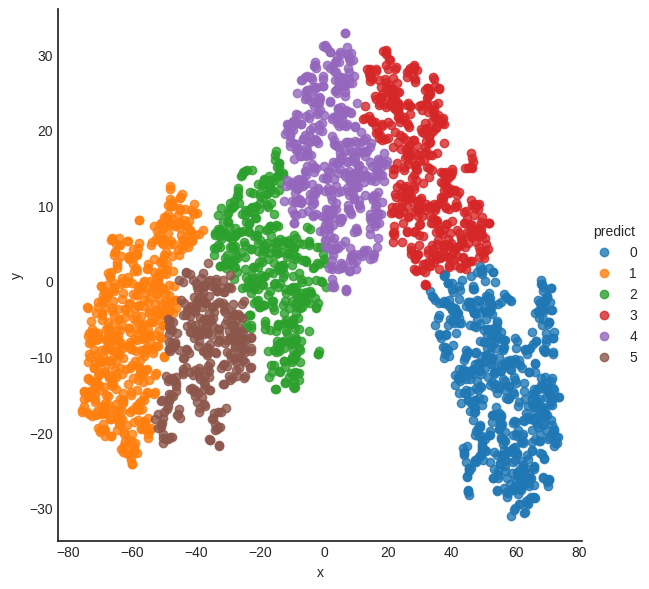

In [ ]:
sns.lmplot(x = 'x', y = 'y', data = results, fit_reg = False, height = 6, hue = 'predict') # hue는 색깔 구분
plt.show()

> average

In [ ]:
avg = AgglomerativeClustering(n_clusters = 6, linkage = 'average')
predict = avg.fit_predict(df)
predict

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
.,65.952652,-10.902525,2
이,64.881569,-26.030592,2
는,65.858093,-28.659065,2
영화,62.160324,-23.891682,2
다,71.777657,-9.396530,2
고,71.942833,-15.496774,2
의,62.756004,-30.710606,2
하,72.817818,-20.693764,2
을,65.970596,-28.710024,2
에,61.242470,-29.493935,2


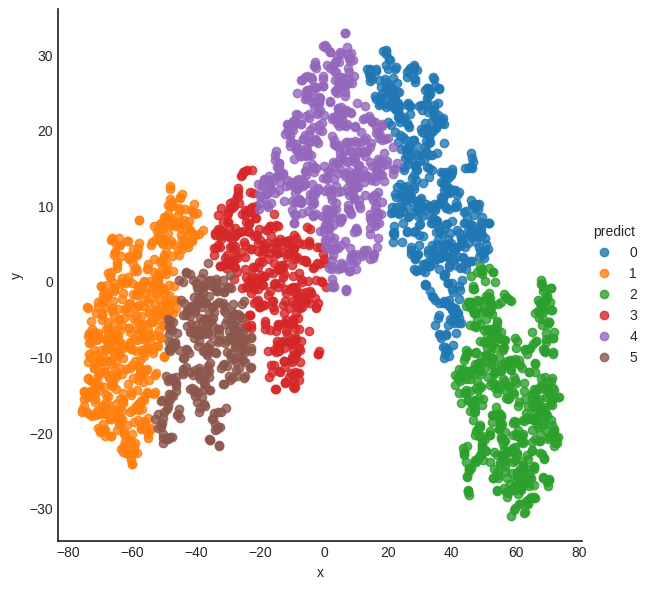

In [ ]:
sns.lmplot(x = 'x', y = 'y', data = results, fit_reg = False, height = 6, hue = 'predict') # hue는 색깔 구분
plt.show()

> complete (최대 거리)

In [ ]:
compl = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
predict = compl.fit_predict(df)
predict

array([3, 3, 3, ..., 0, 0, 0])

In [ ]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
.,65.952652,-10.902525,3
이,64.881569,-26.030592,3
는,65.858093,-28.659065,3
영화,62.160324,-23.891682,3
다,71.777657,-9.396530,3
고,71.942833,-15.496774,3
의,62.756004,-30.710606,3
하,72.817818,-20.693764,3
을,65.970596,-28.710024,3
에,61.242470,-29.493935,3


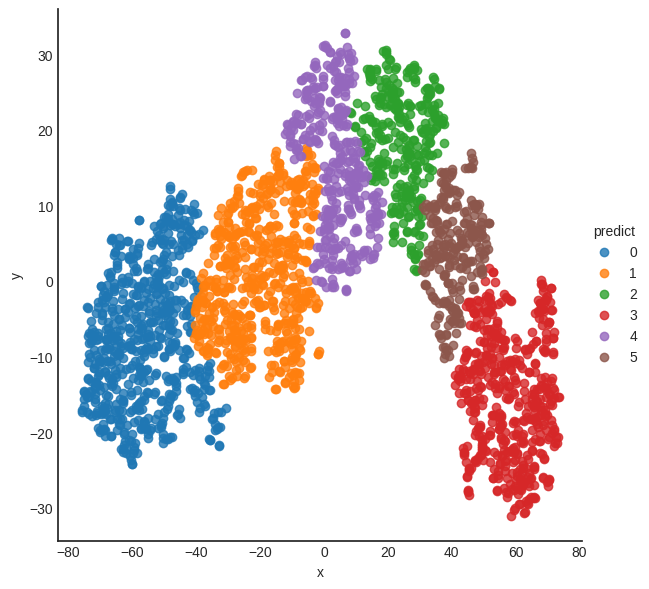

In [ ]:
sns.lmplot(x = 'x', y = 'y', data = results, fit_reg = False, height = 6, hue = 'predict') # hue는 색깔 구분
plt.show()

Scipy (싸이파이)

- scipy를 이용한 거리 사용과 word2vec 사용을 비교

- pdist 를 이용한 각 단어 간 유클리디안 거리 계산

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric = 'euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639
0,0.000000,15.165937,17.756792,13.531443,6.016535,7.549132,20.064362,11.958213,17.807508,19.178799,...,114.110255,114.405619,118.684531,116.242362,102.656575,122.347256,141.442498,117.993686,139.802899,138.578777
1,15.165937,0.000000,2.804010,3.461230,18.006889,12.681592,5.140093,9.563774,2.892289,5.023722,...,113.496806,113.725253,118.417510,115.318948,103.405615,122.631333,140.579416,120.220168,138.819902,138.718653
2,17.756792,2.804010,0.000000,6.033361,20.151588,14.500689,3.719109,10.577514,0.123506,4.690521,...,114.750459,114.967435,119.720122,116.517929,104.896491,124.016794,141.753900,121.907239,139.976187,140.060670
3,13.531443,3.461230,6.033361,0.000000,17.395474,12.890770,6.844893,11.126942,6.142849,5.676944,...,110.598078,110.835273,115.480062,112.462015,100.336728,119.631787,137.734499,117.020998,135.989749,135.747000
4,6.016535,18.006889,20.151588,17.395474,0.000000,6.102479,23.144762,11.345017,20.167622,22.691316,...,119.991183,120.291706,124.532196,122.145855,108.418983,128.137925,147.327183,123.538324,145.697834,144.372194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,122.347256,122.631333,124.016794,119.631787,128.137925,128.535742,121.336944,129.831711,124.136301,119.622890,...,11.163856,11.305458,5.895401,11.625824,19.812845,0.000000,21.053066,15.889262,20.081271,16.238509
2636,141.442498,140.579416,141.753900,137.734499,147.327183,147.322512,138.858388,148.251637,141.870327,137.233056,...,27.343612,27.044540,23.071939,25.286835,40.154727,21.053066,0.000000,34.353239,2.032502,9.547426
2637,117.993686,120.220168,121.907239,117.020998,123.538324,124.670789,119.583307,126.576943,122.029730,117.764108,...,22.470257,22.933629,19.586120,24.639345,19.433606,15.889262,34.353239,0.000000,33.974165,26.418995
2638,139.802899,138.819902,139.976187,135.989749,145.697834,145.643995,137.064532,146.533696,140.092323,135.446698,...,25.745292,25.423860,21.670208,23.584521,38.843583,20.081271,2.032502,33.974165,0.000000,10.315289


각 단어 간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

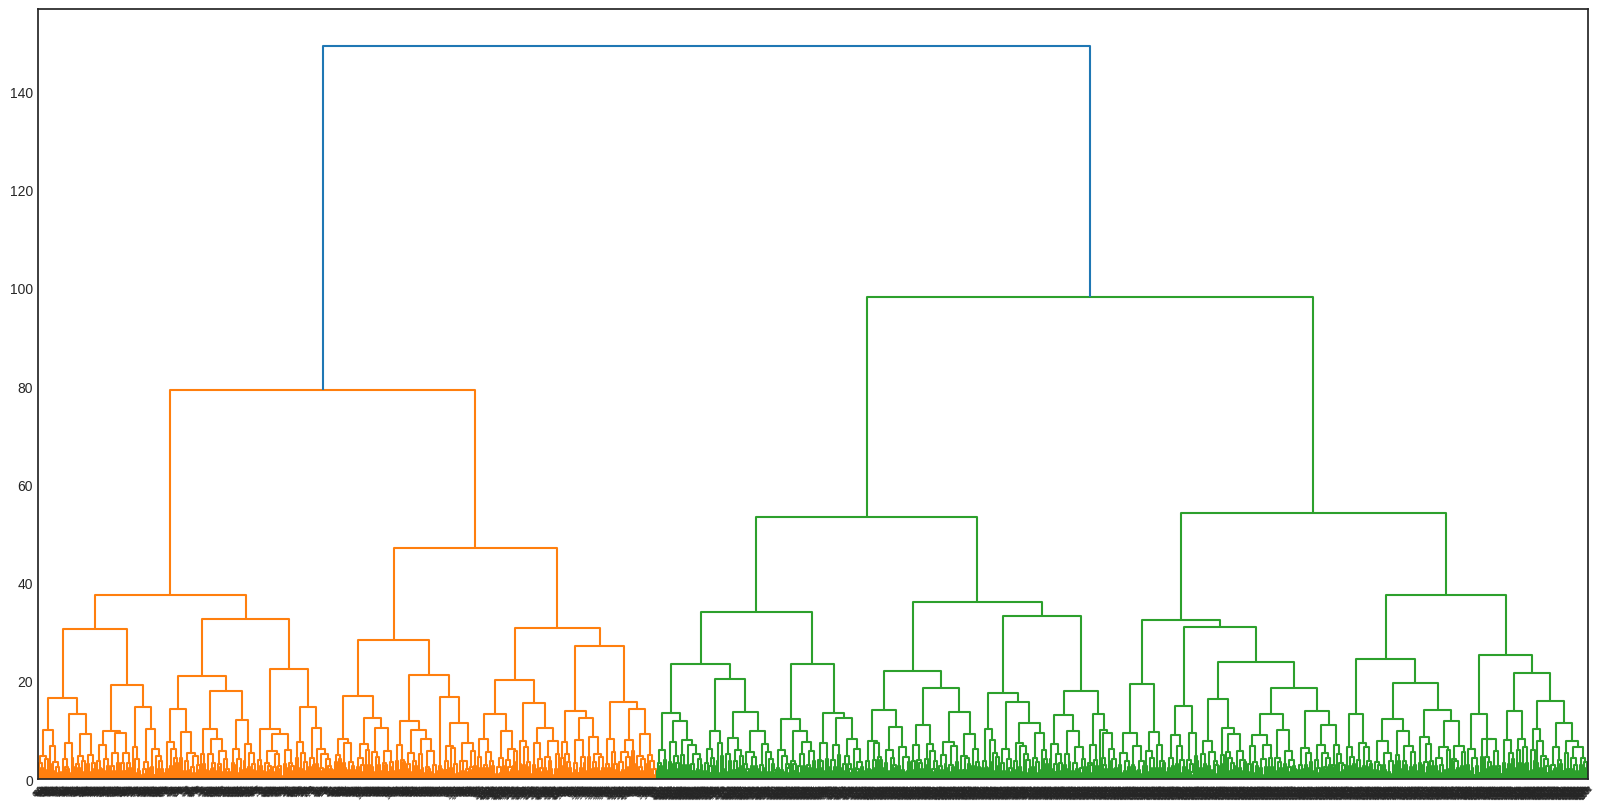

In [ ]:
row_clusters = linkage(distmatrix, method = 'complete')

plt.figure(figsize=(20, 10))
dendrogram(row_clusters,
           leaf_rotation = 50,
           leaf_font_size = 5)

plt.show()

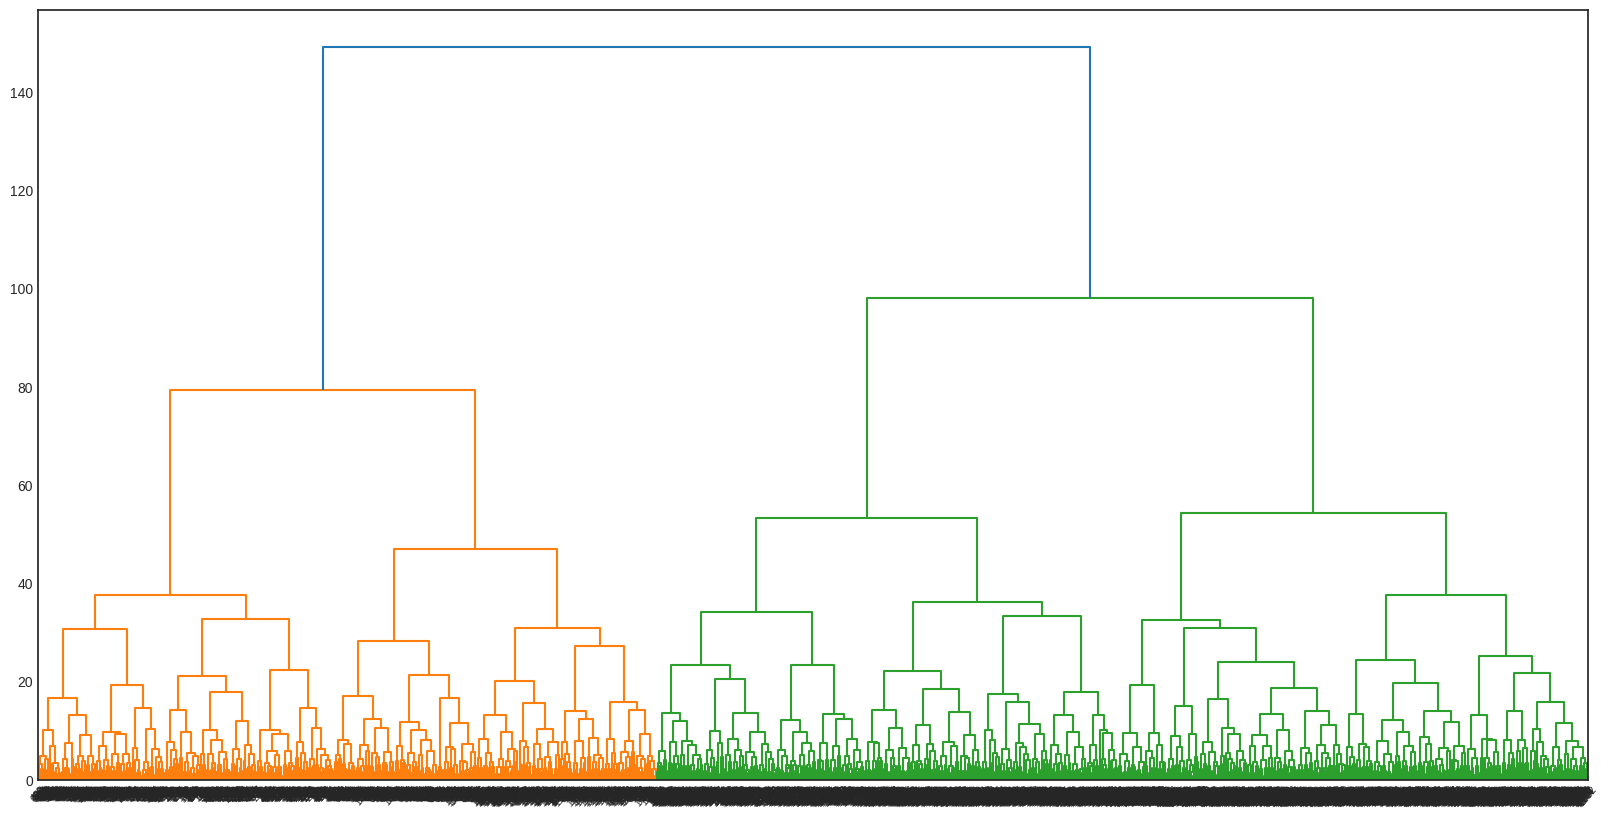

In [ ]:
mergings = linkage(df, method='complete')

plt.figure(figsize=(20, 10))

dendrogram(mergings, leaf_rotation=50, leaf_font_size=7)
plt.show()

Scikit-learn을 이용한 비계층적 군집화
- 비계층적 군집화는 계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는지를 결정
- 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요
- 대표적인 비계층적 군집화 알고리즘인 K-means를 사용해 실습

> 클러스터 개수 3

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
predict = kmeans.fit_predict(df)
predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
.,65.952652,-10.902525,2
이,64.881569,-26.030592,2
는,65.858093,-28.659065,2
영화,62.160324,-23.891682,2
다,71.777657,-9.396530,2
고,71.942833,-15.496774,2
의,62.756004,-30.710606,2
하,72.817818,-20.693764,2
을,65.970596,-28.710024,2
에,61.242470,-29.493935,2


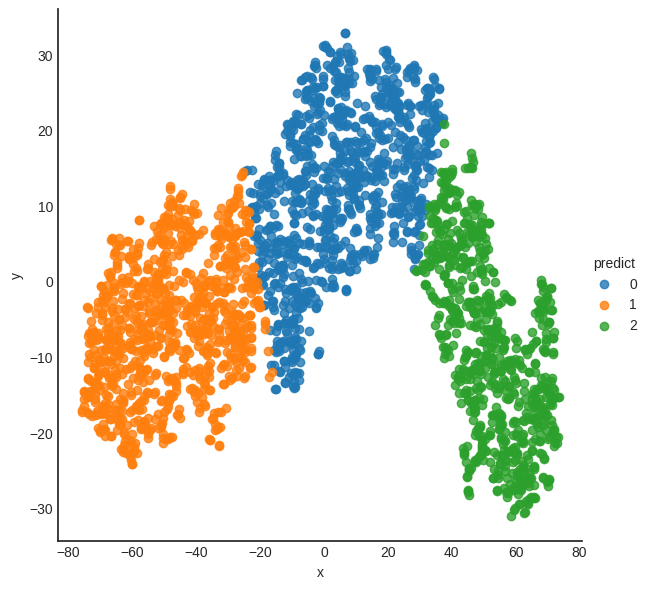

In [ ]:
sns.lmplot(x = 'x', y = 'y', data = results, fit_reg = False, height = 6, hue = 'predict') # hue는 색깔 구분
plt.show()
# 3개의 cluster로 구분됨

> 클러스터 개수 6

In [ ]:
kmeans = KMeans(n_clusters = 6)
predict = kmeans.fit_predict(df)
predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, ..., 0, 4, 4], dtype=int32)

In [ ]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
.,65.952652,-10.902525,2
이,64.881569,-26.030592,2
는,65.858093,-28.659065,2
영화,62.160324,-23.891682,2
다,71.777657,-9.396530,2
고,71.942833,-15.496774,2
의,62.756004,-30.710606,2
하,72.817818,-20.693764,2
을,65.970596,-28.710024,2
에,61.242470,-29.493935,2


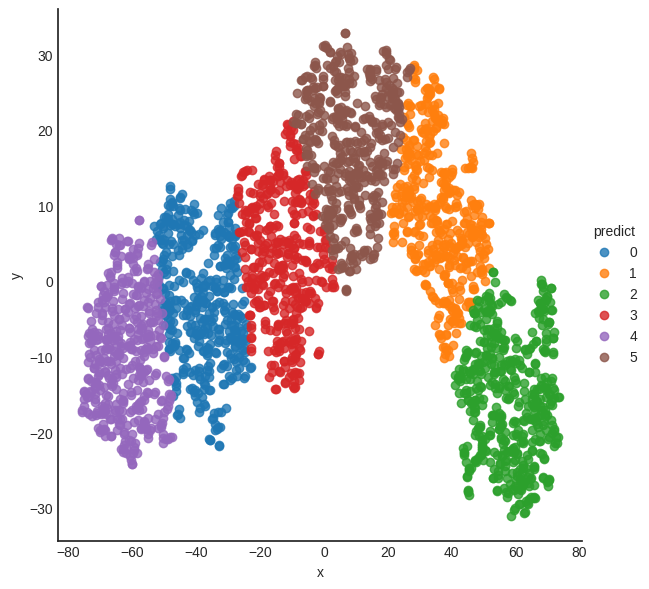

In [ ]:
sns.lmplot(x = 'x', y = 'y', data = results, fit_reg = False, height = 6, hue = 'predict') # hue는 색깔 구분
plt.show()
# 6개 클러스터